# Music Recommendation System using Content-Based Filtering

## Project Overview
This notebook demonstrates a content-based music recommendation system trained on a dataset of tracks with audio features and genres. The goal is to recommend songs to users based on their listening history and preferences using machine learning (K-nearest-neighbours approach).
This is a sub-project to an already existing Django website fetching user's data using Spotify's API (that you can find [HERE](https://github.com/wiktorspryszynski/spotify_music_recommender)), which will be later merged to the said project.

### Key Objectives:
- Load and explore the dataset
- Preprocess the data (handle missing values, scale features)
- Train a machine learning model to recommend songs
- Evaluate model performance
- Merge with Django project


# Loading and exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv('data.csv')
genres_df = pd.read_csv('data_w_genres.csv')


data_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [2]:
genres_df.head(10)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36
6,[],"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2
7,[],"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15


In [3]:
data_df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [4]:
genres_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


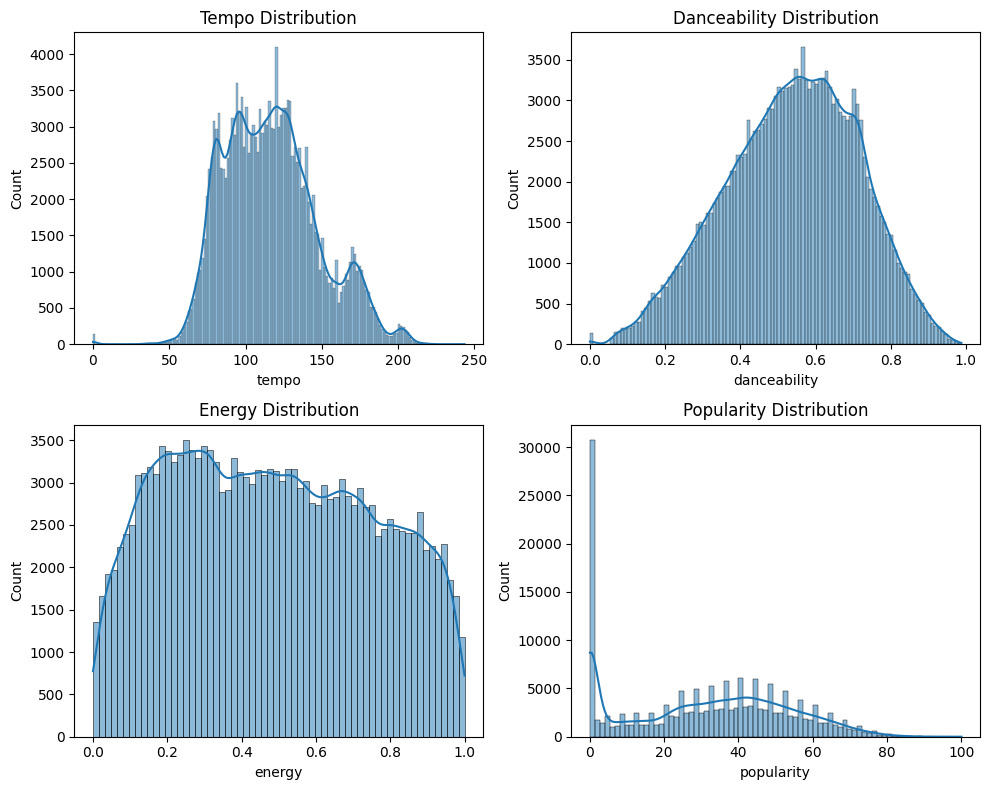

In [5]:
# Plotting important metrics from 'data.csv'
features = ['tempo', 'danceability', 'energy', 'popularity']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.histplot(data_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()



# Preprocessing data
Let's see if all is well in the dataset

We can see that data.csv has artists typed out as a list and data_w_genres.csv has artists typed out singularly as a string.

To overcome that and merge these two together (to have a genre column next to songs) I will add a column to data.csv with an artist that comes up first in a list and then merge it based on that one artist later.

In [6]:
import ast

def str_to_list(str_list):
    try:
        return ast.literal_eval(str_list)
    except (ValueError, SyntaxError):
        return []

data_df['artists'] = data_df['artists'].apply(str_to_list)

data_df['first_artist'] = data_df['artists'].apply(lambda x: x[0] if isinstance(x, list) else None)
data_df.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,first_artist
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Frank Parker
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Phil Regan


In [7]:
missing_values = data_df.isnull().sum()
print(missing_values)

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
first_artist        0
dtype: int64


In [8]:
# The result above looks great, not a single column with missing values

# Unfortunately I saw some songs with 'n/a' as their first artist
# Let's see how many 'N/A' we have in the 'first artist' column
n_a_count = data_df[data_df['first_artist'].str.lower() == 'n/a'].shape[0]
n_a_count


12

In [9]:
data_df[data_df['first_artist'].str.lower() == 'n/a'].head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,first_artist
21791,0.129,1935,0.975,"[n/a, Johann Sebastian Bach, In Motion]",0.317,268400,0.317,0,0VHoDqq7N5VH1UX93Mdyfj,0.956,2,0.0868,-8.978,1,Air,0,1935,0.0389,66.296,n/a
21817,0.205,1935,0.732,"[n/a, Nitsch, Johannes, In Motion]",0.535,279600,0.435,0,0cSyeb33PyBMtLeUzCgDgO,0.253,4,0.1190,-9.021,0,concerto piccolo,0,1935,0.0303,106.124,n/a
40211,0.805,1935,0.254,"[n/a, Grenet, Ernesto, In Motion]",0.628,182400,0.661,0,1GYoPjJvGyYufhbxZmAKmF,0.236,0,0.0572,-7.634,1,drume negrita,0,1935,0.0387,96.198,n/a
58584,0.273,1935,0.981,"[n/a, Händel, Georg Friedrich (DP), In Motion]",0.492,236733,0.286,0,2nUaz5sLG0HccdACC1IG35,0.892,3,0.1430,-8.966,1,i know that my redeemer liveth,0,1935,0.0336,87.973,n/a
58588,0.264,1935,0.867,"[n/a, George Gershwin, In Motion]",0.341,246667,0.424,0,2oYfdKTcUpk3xJZm0CkHJm,0.812,9,0.1600,-8.983,0,summertime,0,1935,0.0305,151.676,n/a


Looks like we have 12 songs where putting the first artist into another column didn't go well (the first artist was put up as 'n/a').

To handle that we could just remove the rows, as it's just 12 values and all of them are from 1935 (so it's safe to say it wouldn't be of that much use), but we can see that all the songs have other, viable singers listed, so instead let's get rid of the 'n/a' and move the second singer first.

In [10]:
# Getting rid of 'N/A' if it's listed as the first artist
data_df['artists'] = data_df['artists'].apply(lambda x: x[1:] if x[0].lower() == 'n/a' else x)

# seeing if it worked (by checking first track by id from result above)
data_df[data_df['id'] == '0VHoDqq7N5VH1UX93Mdyfj']


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,first_artist
21791,0.129,1935,0.975,"[Johann Sebastian Bach, In Motion]",0.317,268400,0.317,0,0VHoDqq7N5VH1UX93Mdyfj,0.956,2,0.0868,-8.978,1,Air,0,1935,0.0389,66.296,n/a


now for the 12 tracks to be all good and well we have to run the script pulling first_artist into a separate column once more

In [11]:
data_df['first_artist'] = data_df['artists'].apply(lambda x: x[0] if isinstance(x, list) else None)
data_df[data_df['first_artist'].str.lower() == 'n/a'].shape[0]

0

In [12]:
data_df[data_df['first_artist'] == None].shape[0]

0

### Merging datasets
Before the merge we can safely get rid of columns describing an artist from data_w_genres.csv besides 'genre' (e.g. energy	instrumentalness	liveness	loudness).
These are all averages for a given artist and we have this data described much better in data.csv already

In [13]:
genres_df = genres_df[['artists', 'genres']]
# Also let's rename the artists column to just artist
genres_df = genres_df.rename(columns={'artists': 'artist'})
genres_df.head(15)

,artist,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
1,"""Cats"" 1983 Broadway Cast",[]
2,"""Fiddler On The Roof” Motion Picture Chorus",[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]
6,"""Mama"" Helen Teagarden",[]
7,"""Test for Victor Young""",[]
8,"""Weird Al"" Yankovic","['comedy rock', 'comic', 'parody']"
9,$NOT,"['emo rap', 'florida rap', 'sad rap', 'undergr..."


Merge the datasets on 'first_artist' from data.csv and 'artists' from data_w_genres.csv

In [14]:
merged_df = pd.merge(data_df, genres_df, left_on='first_artist', right_on='artist', how='left')
merged_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,loudness,mode,name,popularity,release_date,speechiness,tempo,first_artist,artist,genres
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff,Sergei Rachmaninoff,"['classical', 'post-romantic era', 'russian ro..."
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day,Dennis Day,[]
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[]
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Frank Parker,Frank Parker,[]
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,Phil Regan,Phil Regan,[]


Check if any column has missing values

In [15]:
missing_columns = merged_df.isnull().any()
missing_columns

,0
valence,False
year,False
acousticness,False
artists,False
danceability,False
duration_ms,False
energy,False
explicit,False
id,False
instrumentalness,False


We can drop the column 'artist' as it is a duplicate of column 'first_artist' and 'release_date' as we have 'year' of release

In [16]:
merged_df = merged_df.drop(columns=['artist', 'release_date'])
merged_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,first_artist,genres
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954,Sergei Rachmaninoff,"['classical', 'post-romantic era', 'russian ro..."
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936,Dennis Day,[]
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[]
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109,Frank Parker,[]
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665,Phil Regan,[]


Here's a dataframe of 100 songs I favorited and listened to the most (fetched with Spotify's API with my Django project, link at the top of the page), which we will use as a blueprint to recommend songs based on.

In [17]:
fetched_df = pd.read_csv('demofile.txt', sep=';', encoding='ISO-8859-1')
fetched_df['explicit'] = fetched_df['explicit'].apply(lambda x: 1 if x is True else 0)
fetched_df['year'] = fetched_df['release_date'].apply(lambda x: int(x[:4]))
fetched_df = fetched_df.rename(columns={'artist_genres': 'genres'})
fetched_df.head()

,artist_names,song_name,track_id,release_date,duration_ms,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,"['KANKAN', 'Yeat']",Fuk Tha Clout (feat. Yeat),2u8p7hcPih3EhieDLnsnUH,2021-10-05,168401,"['pluggnb', 'rage rap']",1,55,0.544,0.340,1,-14.164,1,0.3050,0.01760,0.000000,0.257,0.1470,154.101,2021
1,['03 Greedo'],Substance,0MoQI1EZGSHLhd5UBdxPol,2018-03-09,219834,"['melodic rap', 'cali rap']",1,66,0.599,0.320,3,-13.716,0,0.0787,0.26000,0.000000,0.106,0.1970,70.998,2018
2,['Travis Scott'],NC-17,6BJbOXDlgVAXSaq6wYFYT2,2018-08-03,156886,"['rap', 'slap house']",1,63,0.804,0.763,2,-5.480,1,0.0519,0.06780,0.000000,0.368,0.0585,136.052,2018
3,['Brent Faiyaz'],Forever Yours,2JqkpMe2eJToJNHEqkJeCu,2023-10-27,96369,"['rap', 'r&b']",1,78,0.646,0.503,2,-7.472,1,0.0312,0.00426,0.000279,0.652,0.7890,137.007,2023
4,['A$AP Rocky'],Tailor Swif,5xMjhZKSo8yh5r9b5vrYRr,2024-08-30,155391,"['rap', 'east coast hip hop', 'hip hop']",1,74,0.824,0.527,8,-5.506,1,0.1180,0.14900,0.000000,0.368,0.2120,77.499,2024


In both dataframes the 'genres' column is a string as opposed to a list, so let's fix that

In [18]:
merged_df['genres'] = merged_df['genres'].apply(eval)
fetched_df['genres'] = fetched_df['genres'].apply(eval)

Some songs have too many genres linked to them which hurts performance of learning. I will limit them to 3 genres per song max, but to ensure that they're not just first 3 songs from randomly sorted list, I will sort them first based on how popular a genre is.

In [19]:
from collections import Counter

all_genres = [genre for genres_list in merged_df['genres'] for genre in genres_list]
genre_frequency = Counter(all_genres)
genre_frequency.most_common(10)

[('rock', 23732),
 ('classic rock', 17059),
 ('adult standards', 14779),
 ('mellow gold', 13722),
 ('folk rock', 12727),
 ('album rock', 12578),
 ('soft rock', 11733),
 ('classical', 10666),
 ('country rock', 9942),
 ('vocal jazz', 8989)]

In [20]:
len(genre_frequency)

2792

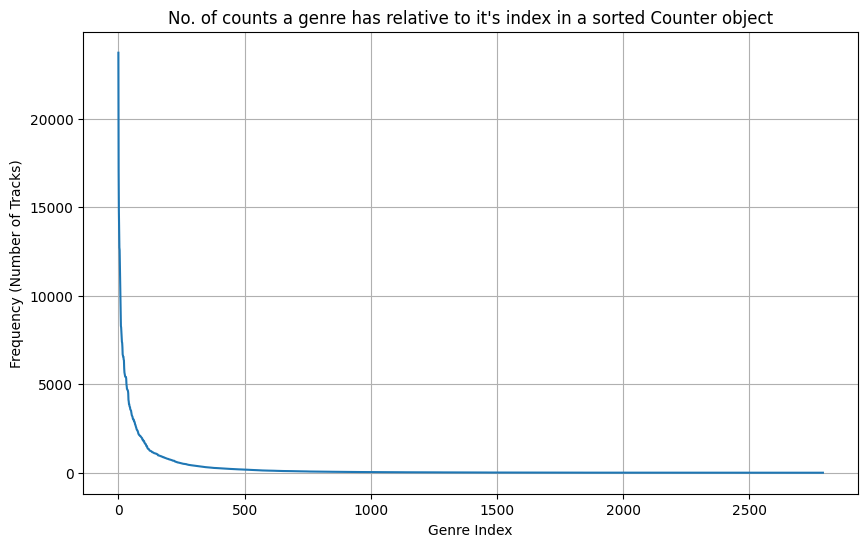

In [21]:
# Plot the distribution of counts relative to the index of the genre
genres, counts = zip(*genre_frequency.most_common())
plt.figure(figsize=(10, 6))
plt.plot(range(len(counts)), counts)
plt.xlabel('Genre Index')
plt.ylabel('Frequency (Number of Tracks)')
plt.title("No. of counts a genre has relative to it's index in a sorted Counter object")
plt.grid(True)

plt.show()

In [22]:
least_common_genres = [item for item in genre_frequency.most_common()[:-10:-1]]
least_common_genres

[('hong kong hip hop', 1),
 ('reggaeton mexicano', 1),
 ('sydney indie', 1),
 ('beatboxing', 1),
 ('lo-fi vgm', 1),
 ('iowa hip hop', 1),
 ('korean trap', 1),
 ('college a cappella', 1),
 ('swedish underground rap', 1)]

In [23]:
len_genres = len(genre_frequency)
median_common_genres = [item for item in genre_frequency.most_common()[len_genres//2-5:len_genres//2+5]]
median_common_genres

[('grime', 15),
 ('sound effects', 15),
 ('israeli pop', 15),
 ('rock baiano', 15),
 ('musica andina', 15),
 ('singaporean pop', 15),
 ('rawstyle', 15),
 ('ilahiler', 14),
 ('sufi chant', 14),
 ('vintage swing', 14)]

In [24]:
genre_frequency.most_common()[500]

('otacore', 178)

In [25]:
genre_frequency.most_common()[300]

('dream pop', 403)

In [26]:
def find_genre(genre_list, genre):
    idx = 0
    for item in genre_list:
        if item[0] == genre:
            return idx
        idx += 1
    return -1

idx = find_genre(genre_frequency.most_common(), 'zolo')
genre_frequency.most_common()[idx], idx

(('zolo', 816), 190)

Seeing that there are a total of almost 2.8K genres and 500th's genre count is close to 150 only, I think it's a good idea to limit this number to about 300, as the least common ones are 'weird' and not of much use, but hurt performance greatly. I also want for each track to have 3 genres tops.

In [27]:
top_300_genres = [item[0] for item in genre_frequency.most_common()[:300]]

def get_top_genres(genres_list, genre_frequency, max_genres, top_genres):
    """
    Function to filter a track's genres by whether they are in the top_genres list,
    sort them by their popularity (frequency), and limit the result to max_genres.
    """
    filtered_genres = [genre for genre in genres_list if genre in top_genres]
    sorted_genres = sorted(filtered_genres, key=lambda genre: genre_frequency.get(genre, 0), reverse=True)
    return sorted_genres[:max_genres]

merged_df['genres_limited'] = merged_df['genres'].apply(lambda x: get_top_genres(x, genre_frequency, max_genres=3, top_genres=top_300_genres))
fetched_df['genres_limited'] = fetched_df['genres'].apply(lambda x: get_top_genres(x, genre_frequency, max_genres=3, top_genres=top_300_genres))

fetched_df.head(20)

,artist_names,song_name,track_id,release_date,duration_ms,genres,explicit,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,genres_limited
0,"['KANKAN', 'Yeat']",Fuk Tha Clout (feat. Yeat),2u8p7hcPih3EhieDLnsnUH,2021-10-05,168401,"[pluggnb, rage rap]",1,55,0.544,0.340,...,-14.164,1,0.3050,0.01760,0.000000,0.257,0.1470,154.101,2021,[]
1,['03 Greedo'],Substance,0MoQI1EZGSHLhd5UBdxPol,2018-03-09,219834,"[melodic rap, cali rap]",1,66,0.599,0.320,...,-13.716,0,0.0787,0.26000,0.000000,0.106,0.1970,70.998,2018,[melodic rap]
2,['Travis Scott'],NC-17,6BJbOXDlgVAXSaq6wYFYT2,2018-08-03,156886,"[rap, slap house]",1,63,0.804,0.763,...,-5.480,1,0.0519,0.06780,0.000000,0.368,0.0585,136.052,2018,[rap]
3,['Brent Faiyaz'],Forever Yours,2JqkpMe2eJToJNHEqkJeCu,2023-10-27,96369,"[rap, r&b]",1,78,0.646,0.503,...,-7.472,1,0.0312,0.00426,0.000279,0.652,0.7890,137.007,2023,"[rap, r&b]"
4,['A$AP Rocky'],Tailor Swif,5xMjhZKSo8yh5r9b5vrYRr,2024-08-30,155391,"[rap, east coast hip hop, hip hop]",1,74,0.824,0.527,...,-5.506,1,0.1180,0.14900,0.000000,0.368,0.2120,77.499,2024,"[rap, hip hop, east coast hip hop]"
5,"['Denzel Curry', 'TiaCorine', 'A$AP Ferg']",HOT ONE (with TiaCorine & A$AP Ferg),2TmS5wJTfWrpFgakSSTdCi,2024-07-19,165271,"[dark trap, pop rap, trap, underground hip hop...",1,66,0.788,0.715,...,-5.211,1,0.1190,0.69800,0.000000,0.152,0.8190,81.523,2024,"[rap, hip hop, pop rap]"
6,['Ramirez'],Na Na Na Na Na (Caught Slippin),6dkYNFH4F8BttEgtjIPoI3,2017-06-10,153260,"[dark trap, cloud rap, phonk]",1,54,0.833,0.895,...,-4.764,1,0.2040,0.06230,0.000310,0.317,0.7700,93.990,2017,[]
7,"['Mustard', 'Travis Scott']",Parking Lot,4IFd7EVCyJsUHesBMXI8ju,2024-06-21,175321,"[pop rap, trap, slap house, rap, southern hip ...",1,71,0.724,0.555,...,-7.200,1,0.0507,0.17000,0.000026,0.322,0.4080,100.047,2024,"[rap, pop rap, trap]"
8,"['Free Nationals', 'A$AP Rocky', 'Anderson .Pa...",Gangsta,49oKnEjgRSs3DMXScEU2G1,2024-02-23,194521,"[neo soul, alternative r&b, escape room, rap, ...",1,55,0.642,0.784,...,-5.098,0,0.1210,0.42900,0.000166,0.225,0.5180,79.969,2024,"[rap, hip hop, neo soul]"
9,"['Young Igi', 'Oki', 'Sergiusz', '2K']",BRAK REGUï¿½,1U7pE3ztxh37auLRtIaWrK,2024-05-23,154055,"[polish trap, polish hip hop]",1,51,0.822,0.728,...,-6.203,1,0.2510,0.23700,0.000000,0.141,0.6760,139.963,2024,[]


In [28]:
fetched_df[fetched_df['genres_limited'].apply(len) == 0].shape[0]

29

# Train the model

Now with genres sorted and limited we can get to teaching the model how to recommend music.<br>Firstly, let's initialize the MultiLabelBinarizer

In [29]:
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

Fit and transform genres in the datasets

In [30]:
genres_encoded_fetched = mlb.fit_transform(fetched_df['genres_limited'])
genres_df_fetched = pd.DataFrame(genres_encoded_fetched, columns=mlb.classes_)
genres_encoded_big = mlb.transform(merged_df['genres_limited'])
genres_df_big = pd.DataFrame(genres_encoded_big, columns=mlb.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['acid rock', 'acoustic blues', 'acoustic pop', 'adult standards', 'album rock', 'alternative country', 'alternative dance', 'alternative hip hop', 'alternative metal', 'alternative r&b', 'alternative rock', 'american folk revival', 'american modern classical', 'anti-folk', 'appalachian folk', 'arkansas country', 'art pop', 'art rock', 'avant-garde jazz', 'bachata', 'banda', 'baroque', 'baroque pop', 'beatlesque', 'bebop', 'big band', 'bluegrass', 'blues', 'blues rock', 'bolero', 'bossa nova', 'bow pop', 'boy band', 'brill building pop', 'british blues', 'british invasion', 'broadway', 'bubblegum pop', 'c-pop', 'canadian pop', 'canadian singer-songwriter', 'ccm', 'chanson', 'chicago blues', "children's music", 'christian alternative rock', 'christian music', 'classic arab pop', 'classic bollywood', 'classic canadian rock', 'classic country pop', 'classic garage rock', 'classic pa

Now we can select the audio features (aside from gernes) we want to be included in the training.<br>
I decided to take 'duration_ms' out, as I don't think that the length of a song is that important to recommend based on it,<br>as well as 'mode', because weird results started to pop up.

In [31]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo',
            'key', 'explicit', 'popularity', 'year']


X_fetched = pd.concat([fetched_df[features], genres_df_fetched], axis=1)
X_big = pd.concat([merged_df[features], genres_df_big], axis=1)

Now let's scale the audio features.

In [32]:
scaler = StandardScaler()

X_big_scaled = scaler.fit_transform(X_big)
X_fetched_scaled = scaler.transform(X_fetched)

In [33]:
num_neighbors = 5
knn = NearestNeighbors(n_neighbors=num_neighbors, algorithm='auto')
knn.fit(X_big_scaled)

# Get recommendations based on user's listening history
distances, indices = knn.kneighbors(X_fetched_scaled)
recommended_indices = indices.flatten()  # All neighbors for all songs in fetched_df
recommendations = merged_df.iloc[recommended_indices]

# Remove duplicates and limit to a certain number (e.g. 50)
recommendations = recommendations.drop_duplicates(subset='id').head(50)

recommendations.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,speechiness,tempo,first_artist,genres,genres_limited
104859,0.4350,2000,0.3060,[Shellac],0.475,170667,0.361,1,3jAbhqTcpsUxlA4x1suTBz,0.000000,...,0.1700,-12.631,1,Prayer To God,42,0.3800,146.593,Shellac,"[alternative rock, chicago indie, chicago punk...","[alternative rock, indie rock, post-punk]"
89787,0.4600,2008,0.0917,"[Cali Life Style, Raylene]",0.624,408480,0.473,1,7xjIdqgWa0rJliVs23JFqx,0.000000,...,0.1290,-11.115,1,Coastin',46,0.2040,169.892,Cali Life Style,"[chicano rap, latin hip hop]",[latin hip hop]
92091,0.4860,2019,0.1630,[Rod Wave],0.637,178678,0.437,1,0F9at9W2UkP504cIxKE1K8,0.000000,...,0.1240,-13.836,1,Sky Priority,62,0.3220,171.477,Rod Wave,[florida rap],[]
170103,0.1080,2018,0.0503,"[Phora, 6LACK]",0.600,238232,0.484,1,0KRkgRkBa1fA4vJl8PMOTf,0.000000,...,0.0995,-8.838,1,Stuck in My Ways (feat. 6LACK),58,0.1450,121.209,Phora,"[deep underground hip hop, oc rap, pop r&b, sa...",[pop r&b]
56990,0.0370,2018,0.4160,[Joji],0.458,176804,0.378,1,77UXyXy6qie0sOtLdEIH4A,0.091900,...,0.0966,-11.354,0,Demons,69,0.1500,168.232,Joji,"[alternative r&b, viral pop]","[alternative r&b, viral pop]"
124470,0.2170,2018,0.0501,[ION LIL GUT],0.712,123587,0.668,1,5A5I22otsloR7rmsiIq0R8,0.000000,...,0.2530,-8.526,0,HighSchool,63,0.0386,86.018,ION LIL GUT,[melodic rap],[melodic rap]
155161,0.4730,2018,0.0595,[YNW Melly],0.721,135168,0.411,1,0hjyDFEpTFsSODk0Nv4Sbx,0.000007,...,0.1320,-9.559,1,Wine For Me,57,0.0456,100.020,YNW Melly,[melodic rap],[melodic rap]
140655,0.0651,2019,0.3860,[Xavier Weeks],0.851,150882,0.404,1,1RXrVtbyz0G2KzbxizfRl0,0.000002,...,0.0733,-11.855,1,Team,63,0.1240,100.000,Xavier Weeks,[melodic rap],[melodic rap]
74789,0.1230,2018,0.0593,[Lil Mosey],0.750,174316,0.476,1,0xNDvMqlGkOLEH66Z45FCL,0.000000,...,0.1990,-7.864,0,Greet Her,65,0.0412,94.995,Lil Mosey,"[melodic rap, rap conscient, vapor trap]",[melodic rap]
57015,0.5590,2019,0.6190,"[Lil Tjay, Lil Durk]",0.688,210120,0.489,1,2wUwC1gBJIC05JH87v2hgN,0.000000,...,0.1530,-7.627,0,Brothers (feat. Lil Durk) - Remix,69,0.1730,85.404,Lil Tjay,"[brooklyn drill, melodic rap, nyc rap]",[melodic rap]


## Evaluating the model's performance - TO BE DONE

It's hard to evaluate a music recommender's performance as music is subjective and so is liking and disliking a certain track.<br>
Let's see, however, how it stands against Spotify API's built-in recommendation endpoint.<br>

In [34]:
#pip install dotenv
#from dotenv import load_dotenv
#import os

#load_dotenv()

#CLIENT_ID = os.getenv("CLIENT_ID")
#CLIENT_SECRET = os.getenv("CLIENT_SECRET")

In [35]:
#seed_tracks = fetched_df['track_id'].head(5).tolist()
#seed_tracks

In [41]:
# continue here

## Implementing the model in the Django project

Save the model and dataset as pkl files

In [42]:
import joblib
joblib.dump(mlb, 'mlb.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(knn, 'knn_model.joblib')
joblib.dump(merged_df, 'merged_dataset.pkl')
X_big.to_csv('X_big_features.csv', index=False)


Uncomment to download the model and dataset

In [43]:
"""
from google.colab import files
files.download('knn_model.joblib')
files.download('X_big_features.csv')
files.download('mlb.joblib')
files.download('scaler.joblib')
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Not much more to be seen here, to see the merge with the Django project click the link to my [GitHub repo](https://github.com/wiktorspryszynski/spotify_music_recommender).<br>
As this is the end: **thank you** for going through my project!